In [1]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

2023-11-26 22:47:01.921529: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-26 22:47:01.921546: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-26 22:47:01.921550: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-26 22:47:01.921574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-26 22:47:01.921586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# print(conv.weights[0])
# 가중치
# print(conv.weights[1])
# 절편

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03129395 0.09632801


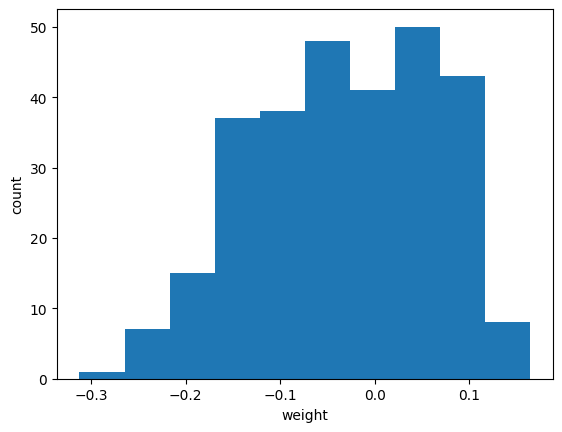

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [6]:
# fig, axs = plt.subplots(2, 16, figsize=(15, 2))
# for i in range(2):
#     for j in range(16):
#         axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
#         axs[i, j].axis('off')
#     plt.show()

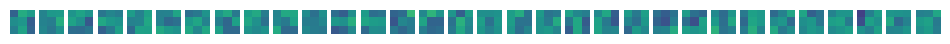

In [7]:
fig, axs = plt.subplots(1, 32, figsize=(12, 2))
for i in range(32):
    axs[i].imshow(conv_weights[:,:,0,i], vmin=-0.5, vmax=0.5)
    axs[i].axis('off')

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0033780697 0.081844784


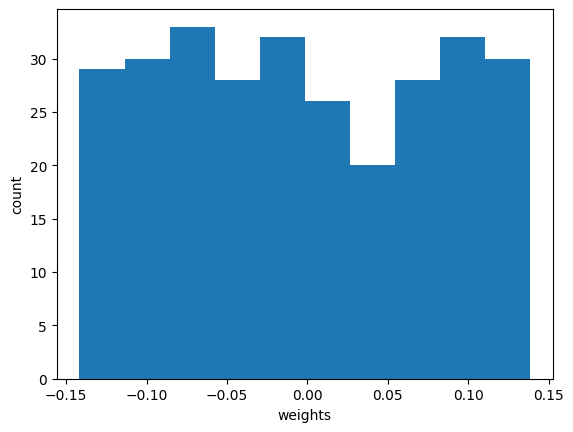

In [11]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

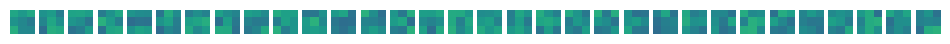

In [12]:
fig, axs = plt.subplots(1, 32, figsize=(12, 2))
for i in range(32):
    axs[i].imshow(no_training_weights[:,:,0,i], vmin=-0.5, vmax=0.5)
    axs[i].axis('off')

In [13]:
# 함수형 API
# 함수처럼 호출 가능
# dense1 = keras.layers.Dense(100, activation='sigmoid')
# dense1 = keras.layers.Dense(10, activation='softmax')
# hidden = dense1(inputs)
# outputs = dense2(hidden)
# model = keras.Model(inputs, outputs)
# inputs = keras.Input(shape=(784,))

In [14]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [19]:
conv_acti = keras.Model(model.input, model.layers[0].output)
# 첫번째 컨볼루션만 떼오는 것이라고 생각

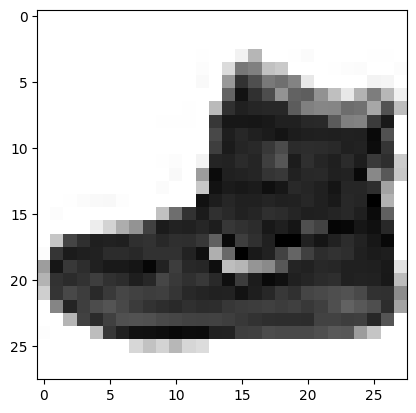

In [20]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [21]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
# 첫번째 신발만 따옴

1/1 [==============================] - 0s 37ms/step


In [23]:
print(feature_maps.shape)
# 세임 패딩 32개의 필터를 사용한 합성곱 층의 출력 -> (28, 28, 32)
# 첫번째 차원은 배치 차원 -> 샘플이 하나이기 때문에 1

(1, 28, 28, 32)


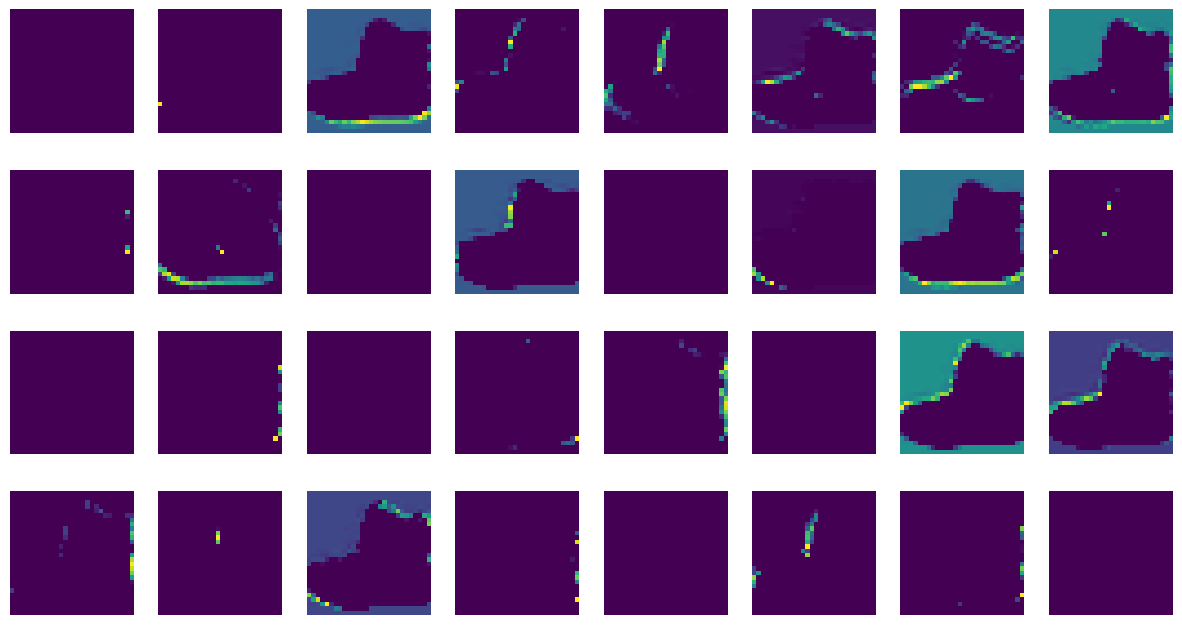

In [25]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [26]:
# 위의 특성맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줌
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [27]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 122ms/step


In [29]:
print(feature_maps.shape)

(1, 14, 14, 32)


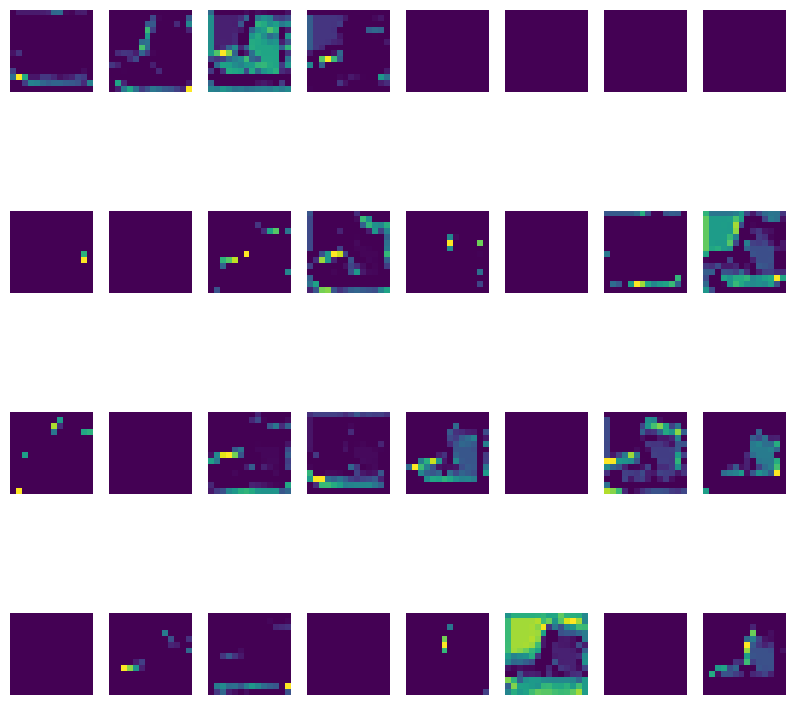

In [36]:
fig, axs = plt.subplots(4, 8, figsize=(10, 10))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

가중치 시각화, 특성 맵 시각화, 함수형 API<br/>
TensorFlow: Model